<a href="https://colab.research.google.com/github/Vishvam17/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Trying to optimize a users portfolio using Efficient Frontier

In [ ]:
from pandas_datareader import data as web 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use("fivethirtyeight")

In [ ]:
#Getting Stok Smybols/ticker in a Fictional Portfolio
#FAANG
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
#Assigning weights to the stocks.
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
# Getting the stock/portfolio starting & ending date
stockStartDate='2013-01-01' 
today=datetime.today().strftime('%Y-%m-%d')
today

'2020-11-09'

In [ ]:
#storing close proce after fetching it from yahoo stocks
df=pd.DataFrame()
for stock in assets:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close'] 

In [ ]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823


<Figure size 1440x720 with 0 Axes>

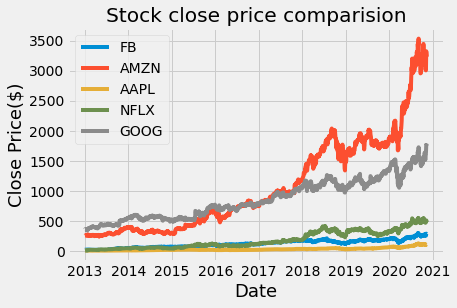

<Figure size 1440x720 with 0 Axes>

In [ ]:
#Visualization of the data
title='Stock close price comparision'
my_stock=df

for c in my_stock.columns.values:
  plt.plot(my_stock[c],label=c)

plt.title(title)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price($)",fontsize=18)
plt.legend(my_stock.columns.values,loc="upper left")
plt.figure(figsize=(20,10))

In [ ]:
#show the daily simple return
returns=df.pct_change()
returns.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974


In [ ]:
#Creating and showing the annualized covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual.head()

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.119647,0.055297,0.044939,0.056776,0.050791
AMZN,0.055297,0.094754,0.039903,0.063750,0.048235
AAPL,0.044939,0.039903,0.082008,0.034948,0.038958
NFLX,0.056776,0.063750,0.034948,0.212854,0.049224
GOOG,0.050791,0.048235,0.038958,0.049224,0.066649


In [ ]:
#Calculate portfolio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.0616622839345414

In [ ]:
#calculate the portfolio volitality aka standard deviation
port_volatility=np.sqrt(port_variance)
port_volatility

0.24831891578077858

In [ ]:
#calculate the annual portfolio return (trading days = 252) 
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)* 252
portfolioSimpleAnnualReturn

0.3636126646626188

In [ ]:
#show expected annual return volitality (risk) and variance 

percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print("Annual Variance "+percent_var)
print("Annual Risk "+percent_vols)
print("Expected Annual Return "+percent_ret)

Annual Variance 6.0%
Annual Risk 25.0%
Expected Annual Return 36.0%


In [ ]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.2MB/s 


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

In [ ]:
#Portfolio Optimization with PyPortfolioOpt
#Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

#optimize for max sharpe ratio
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.11292), ('AMZN', 0.31827), ('AAPL', 0.24209), ('NFLX', 0.32672), ('GOOG', 0.0)])
Expected annual return: 42.0%
Annual volatility: 27.2%
Sharpe Ratio: 1.47


(0.419792555469208, 0.27241094525341, 1.4676082677122295)

In [ ]:
#Get Discrete Allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
money_to_invest=20000
latest_price=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_price,total_portfolio_value=money_to_invest)
allocation,leftover=da.lp_portfolio()
print('Discrete Allocation(Number of Shares can be bought): ',allocation)
print('Fund Remains: ${:.2f}'.format(leftover))


Discrete Allocation(Number of Shares can be bought):  {'FB': 8, 'AMZN': 2, 'AAPL': 40, 'NFLX': 13}
Fund Remains: $83.59
